# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,287.397644,290.169723,286.403505,288.602050,1963682
1,2010-01-05,287.474121,290.418265,285.447641,288.678551,2014488
2,2010-01-06,280.974030,287.607914,280.266681,287.474075,3349176
3,2010-01-07,273.154877,282.713768,271.854858,281.222571,6474892
4,2010-01-08,267.572601,274.722660,266.310832,273.766770,6048178


In [5]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-5-3502562368>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,287.397644,290.169723,286.403505,288.602050,1963682
1,287.474121,290.418265,285.447641,288.678551,2014488
2,280.974030,287.607914,280.266681,287.474075,3349176
3,273.154877,282.713768,271.854858,281.222571,6474892
4,267.572601,274.722660,266.310832,273.766770,6048178


Visualizing Closing Price

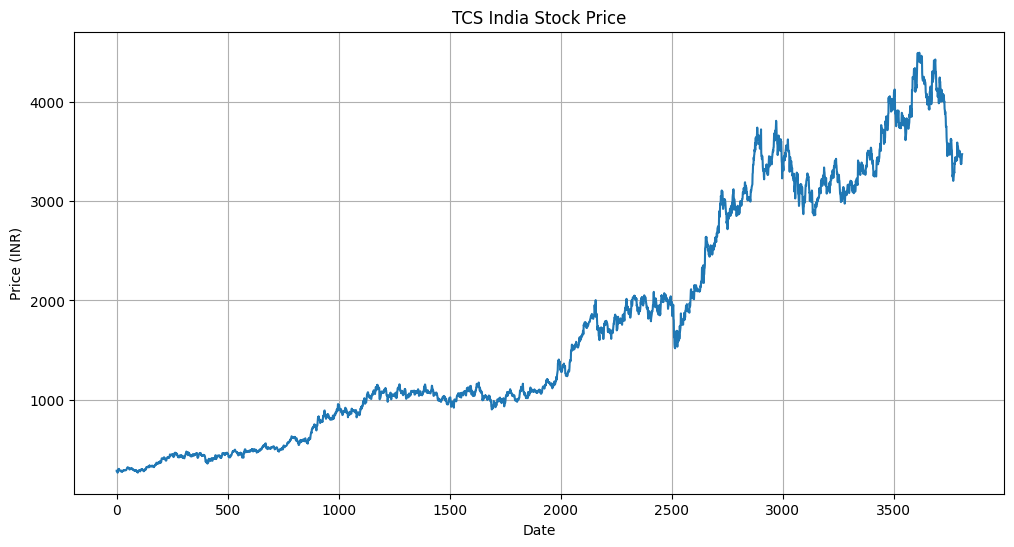

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,287.397644,290.169723,286.403505,288.602050,1963682
1,287.474121,290.418265,285.447641,288.678551,2014488
2,280.974030,287.607914,280.266681,287.474075,3349176
3,273.154877,282.713768,271.854858,281.222571,6474892
4,267.572601,274.722660,266.310832,273.766770,6048178
...,...,...,...,...,...
3805,3371.100098,3409.000000,3363.699951,3409.000000,3584683
3806,3384.199951,3390.899902,3358.699951,3371.100098,2070390
3807,3421.899902,3434.000000,3390.899902,3400.000000,1718678


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3805,3637.908523
3806,3631.813018
3807,3623.851841
3808,3616.049004


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

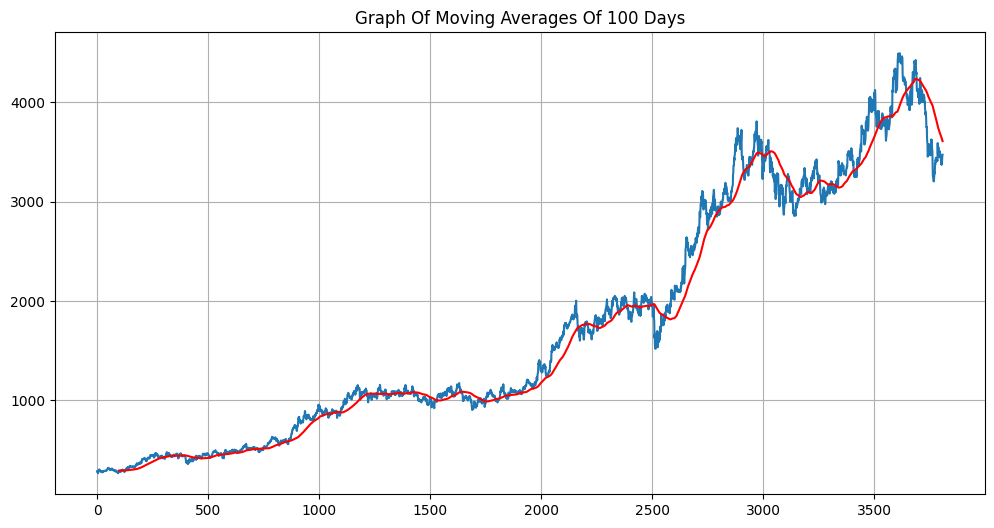

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3805,3928.645488
3806,3923.785934
3807,3918.750148
3808,3913.755123


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

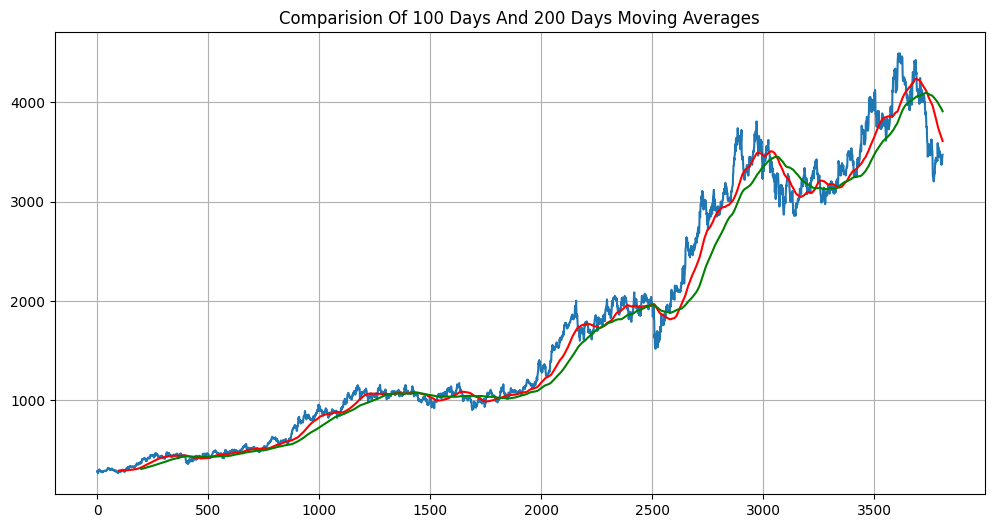

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(3810, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2667, 6)
(1143, 6)


In [14]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,287.397644,290.169723,286.403505,288.602050,1963682
1,2010-01-05,287.474121,290.418265,285.447641,288.678551,2014488
2,2010-01-06,280.974030,287.607914,280.266681,287.474075,3349176
3,2010-01-07,273.154877,282.713768,271.854858,281.222571,6474892
4,2010-01-08,267.572601,274.722660,266.310832,273.766770,6048178


In [15]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2667,2020-10-27,2464.459473,2546.915774,2458.790785,2529.675003,3537502
2668,2020-10-28,2457.010010,2488.633871,2441.830602,2483.058747,3569445
2669,2020-10-29,2466.800781,2487.742889,2436.441976,2443.703750,3105968
2670,2020-10-30,2496.973389,2505.874920,2456.447995,2470.034543,3427003
2671,2020-11-02,2440.519043,2496.973495,2436.255632,2492.428938,2571196


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00811415],
       [0.00814611],
       [0.00764294],
       ...,
       [0.92915087],
       [0.93964149],
       [0.94048285]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2567, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - loss: 0.0468 - mean_absolute_error: 0.1526
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0056 - mean_absolute_error: 0.0515
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0050 - mean_absolute_error: 0.0472
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0044 - mean_absolute_error: 0.0455
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0037 - mean_absolute_error: 0.0418
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0038 - mean_absolute_error: 0.0429
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0034 - mean_absolute_error: 0.0407
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0035 - mean_absolute_error: 0.0404
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0033 - mean_absolute_error: 0.0393
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0028 - mean_absolute_error: 0.0357
Epoch 11/100
81/81 ━━━━━━━━

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(1143, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [31]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [32]:
final_df.head()

,0
0,1934.719792
1,1920.616158
2,1933.602505
3,1954.967710
4,1872.300554


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02362943],
       [0.01829035],
       [0.02320647],
       ...,
       [0.57832587],
       [0.59346826],
       [0.60482506]])

In [34]:
input_data.shape

(1243, 1)

# Testing the model

---



In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1143, 100, 1)
(1143,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [37]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [38]:
y_pred.shape

(1143, 1)

In [39]:
y_test

array([0.24885566, 0.23120861, 0.21631038, ..., 0.57832587, 0.59346826,
       0.60482506])

In [40]:
y_pred

array([[0.26828766],
       [0.2715427 ],
       [0.27365527],
       ...,
       [0.5817379 ],
       [0.57809454],
       [0.57696474]], dtype=float32)

In [41]:
scaler.scale_

array([0.00037856])

In [42]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

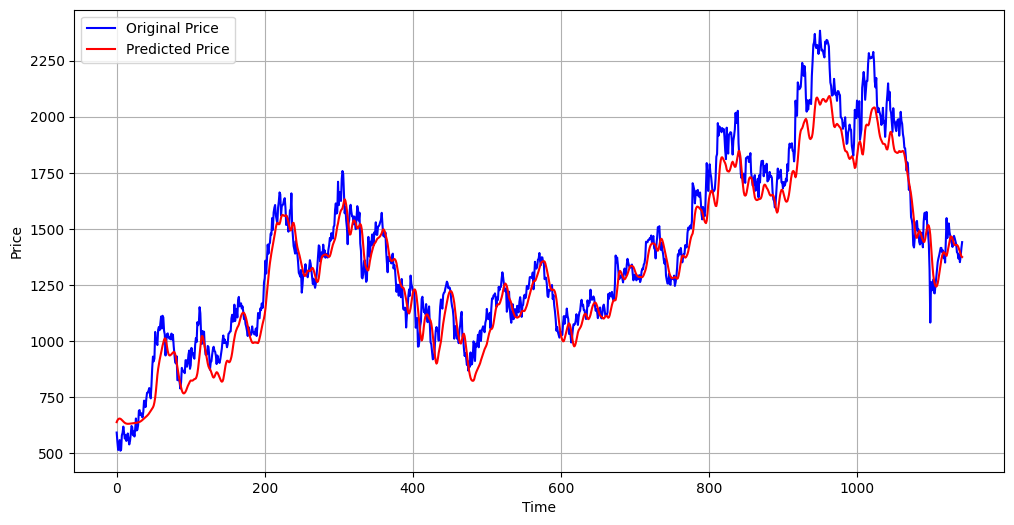

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.91%


Calculation of R2 score

In [45]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9276195053021544


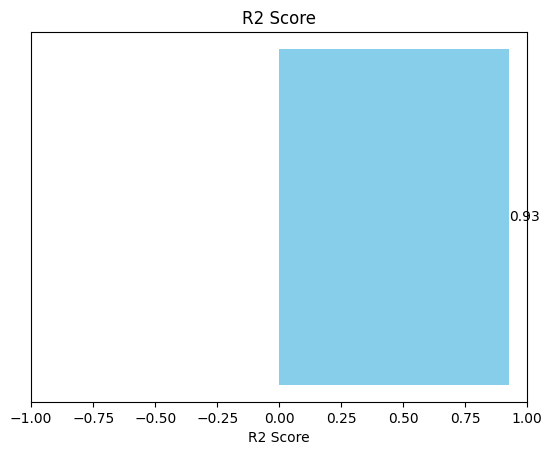

In [46]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

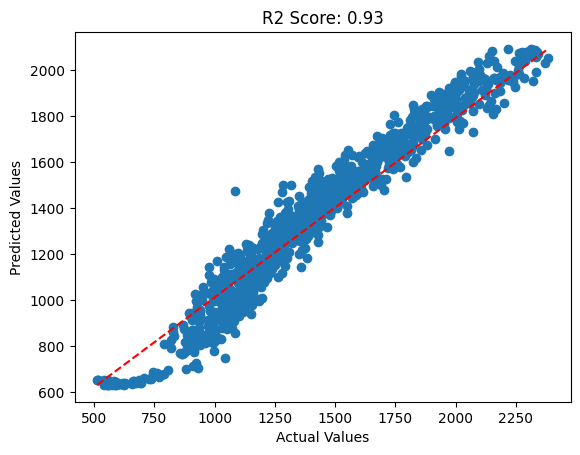

In [47]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()